Importing the needed libraries for the initial loading and exploration

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Read csv into the data variable, note that pandas already loads it into a dataframe. In case of csv and tsv sep is used to declare the separator

In [8]:
data = pd.read_csv('/home/gergo/Documents/szakdoga projekt/river1.csv', sep=';')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                356 non-null    object 
 1   temp_c                              342 non-null    float64
 2   pH                                  342 non-null    float64
 3   DO_㎎/L                              342 non-null    float64
 4   transparency                        342 non-null    float64
 5   turbidity                           342 non-null    float64
 6   Chl-a_mg/m                          341 non-null    float64
 7   cyanobacterial_cell_sum_(cells/ml)  342 non-null    float64
 8   Microcystis                         342 non-null    float64
 9   Anabaena                            342 non-null    float64
 10  Oscillatoria                        342 non-null    float64
 11  Aphanizomenon                       342 non-n

Convert the date column to datetime format

In [10]:
data['date']= pd.to_datetime(data['date'])


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                356 non-null    datetime64[ns]
 1   temp_c                              342 non-null    float64       
 2   pH                                  342 non-null    float64       
 3   DO_㎎/L                              342 non-null    float64       
 4   transparency                        342 non-null    float64       
 5   turbidity                           342 non-null    float64       
 6   Chl-a_mg/m                          341 non-null    float64       
 7   cyanobacterial_cell_sum_(cells/ml)  342 non-null    float64       
 8   Microcystis                         342 non-null    float64       
 9   Anabaena                            342 non-null    float64       
 10  Oscillatoria              

Check the number of NaN values in a column

In [12]:
print(data.isna().sum())

date                                   0
temp_c                                14
pH                                    14
DO_㎎/L                                14
transparency                          14
turbidity                             14
Chl-a_mg/m                            15
cyanobacterial_cell_sum_(cells/ml)    14
Microcystis                           14
Anabaena                              14
Oscillatoria                          14
Aphanizomenon                         14
dtype: int64


This is a kinda jank way to check where the nan values are. It dumps the row numbers into a list

In [13]:
num = 0
truelist = []
for i in data['Chl-a_mg/m'].isna():
    num = num + 1
    if i==True:
        truelist.append(num)

In [14]:
print(truelist)

[4, 11, 75, 76, 135, 136, 160, 182, 183, 250, 252, 253, 254, 275, 280]


A Boxplot is an easy option to check on the distribution of data 

<AxesSubplot:>

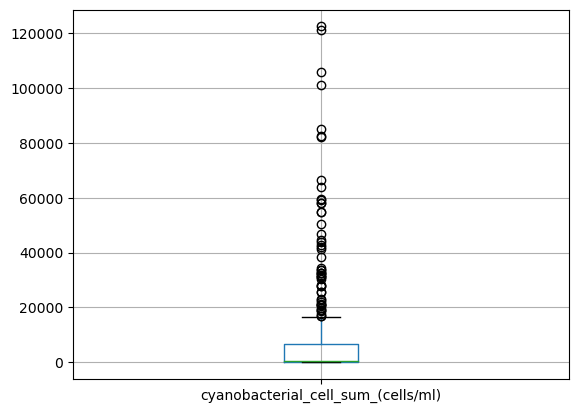

In [17]:
data.boxplot(column='cyanobacterial_cell_sum_(cells/ml)')

A histplot is also a good visual representation for the same purpose

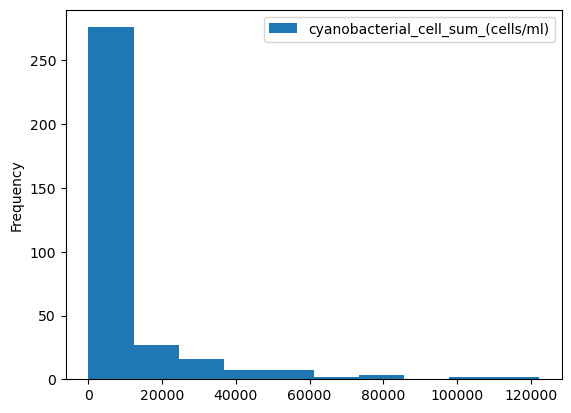

In [18]:
data[['cyanobacterial_cell_sum_(cells/ml)']].plot.hist()
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                356 non-null    datetime64[ns]
 1   temp_c                              342 non-null    float64       
 2   pH                                  342 non-null    float64       
 3   DO_㎎/L                              342 non-null    float64       
 4   transparency                        342 non-null    float64       
 5   turbidity                           342 non-null    float64       
 6   Chl-a_mg/m                          341 non-null    float64       
 7   cyanobacterial_cell_sum_(cells/ml)  342 non-null    float64       
 8   Microcystis                         342 non-null    float64       
 9   Anabaena                            342 non-null    float64       
 10  Oscillatoria              

In [21]:
data.dropna(inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 355
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                341 non-null    datetime64[ns]
 1   temp_c                              341 non-null    float64       
 2   pH                                  341 non-null    float64       
 3   DO_㎎/L                              341 non-null    float64       
 4   transparency                        341 non-null    float64       
 5   turbidity                           341 non-null    float64       
 6   Chl-a_mg/m                          341 non-null    float64       
 7   cyanobacterial_cell_sum_(cells/ml)  341 non-null    float64       
 8   Microcystis                         341 non-null    float64       
 9   Anabaena                            341 non-null    float64       
 10  Oscillatoria              

In [23]:
data.describe()

,temp_c,pH,DO_㎎/L,transparency,turbidity,Chl-a_mg/m,cyanobacterial_cell_sum_(cells/ml),Microcystis,Anabaena,Oscillatoria,Aphanizomenon
count,341.000000,341.000000,341.000000,341.000000,341.00000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,18.125513,8.339003,10.936950,1.073021,7.19912,26.388856,8290.126100,6892.439883,181.736070,63.498534,1152.451613
std,8.489275,0.544953,1.960518,0.515044,9.06809,16.539998,18581.179207,17598.909017,819.707168,522.775352,4567.171227
min,2.900000,6.700000,7.000000,0.200000,1.10000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.300000,8.000000,9.400000,0.700000,3.20000,13.700000,40.000000,0.000000,0.000000,0.000000,0.000000
50%,19.500000,8.400000,10.700000,1.000000,4.70000,23.100000,445.000000,60.000000,0.000000,0.000000,71.000000
75%,25.300000,8.800000,12.400000,1.400000,7.30000,34.800000,6282.000000,3375.000000,65.000000,0.000000,286.000000
max,32.500000,9.500000,15.400000,3.500000,79.10000,96.700000,122369.000000,120800.000000,8446.000000,9263.000000,51633.000000


Import the scikit learn libraris for linear regression and train test splitting

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Using pairplot to visualize data, pairwise by columns. It can give a hint on the linearity between your dependent and independent variables

In [28]:
sns.pairplot()
plt.show()

TypeError: pairplot() missing 1 required positional argument: 'data'

For some models it's useful to change your dataframe into a numpy array. Also some models expect your y to be 1d so an additional .ravel might be useful 

In [29]:
X = data[['DO_㎎/L']].values
y = data[['cyanobacterial_cell_sum_(cells/ml)']].values

Yup it's an array

In [30]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [31]:
print(type(data[['DO_㎎/L']]))
print(type(data[['cyanobacterial_cell_sum_(cells/ml)']]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Split the data into training and testing sets 

In [32]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=2022)

In [33]:
lreg = LinearRegression()

Fitting the model to the dataset

In [34]:
lreg.fit(X_train,y_train)

LinearRegression()

With score you can check how well your model performs. It's a pretty horrible model :(

In [35]:
print(lreg.score(X_test,y_test))

0.06415340313946638


In [36]:
plt.scatter(X_test, y_test, color ='b')

In [37]:
y_pred = lreg.predict(X_test)

In [38]:
plt.plot(X_test, y_pred, color ='k')

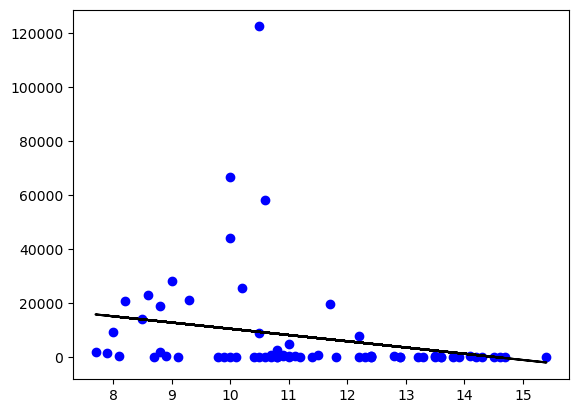

In [39]:
plt.show()

Import the decision tree and grid search for hyperparameter optimization

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [41]:
dectree = DecisionTreeRegressor()

In [42]:
X2 = data[['DO_㎎/L','temp_c','pH']].values
y2 = data[['cyanobacterial_cell_sum_(cells/ml)']].values

Grid search uses the parameters dictionary to get the hyperparameters you want to test

In [43]:
parameters={"max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_leaf_nodes":[None,1,2,3,4,5,6,7,8,9,10] }

In [44]:
 X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, y2, test_size=0.20, random_state=2022)

In [45]:
dectree.fit(X_train2,y_train2)

DecisionTreeRegressor()

In [46]:
tuning_model=GridSearchCV(estimator=dectree,param_grid=parameters,scoring='r2',cv=3,verbose=3)

In [67]:
tuning_model.fit(X_train2,y_train2)

TypeError: fit() missing 1 required positional argument: 'X'

In [48]:
tuning_model.best_params_


{'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 2}

In [49]:
tuning_model.best_score_

0.44494221719392435

In [50]:
bestmodel= tuning_model.best_estimator_

In [51]:
bestmodel.fit(X_train2,y_train2)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10, min_samples_leaf=2)

In [52]:
from sklearn import tree

In [53]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(bestmodel, filled=True)


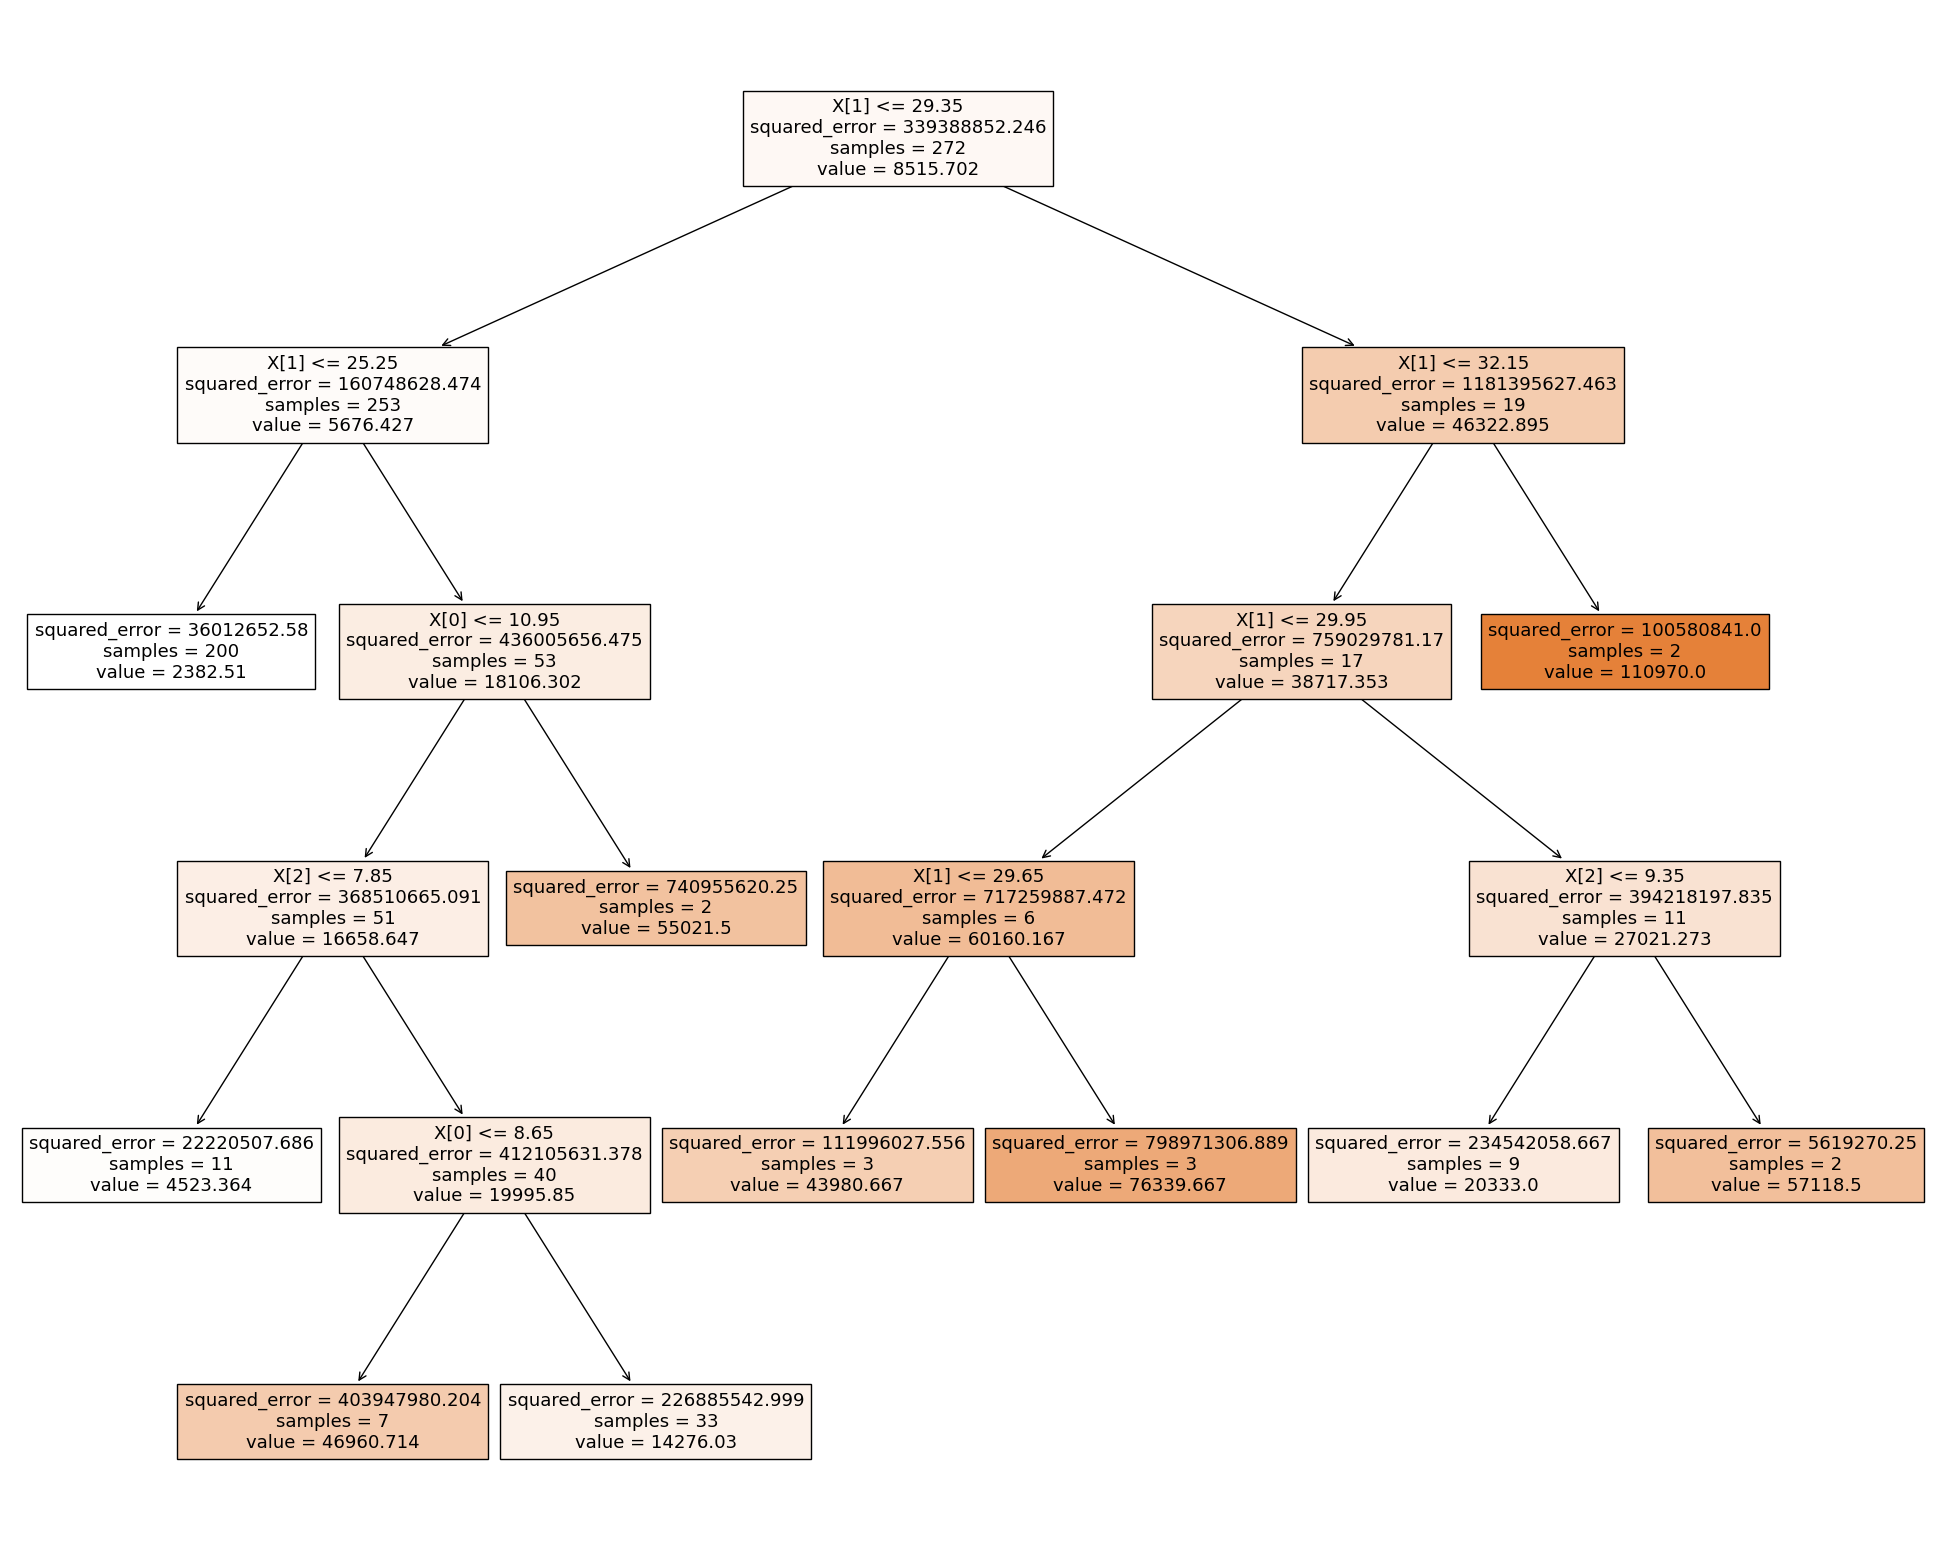

In [54]:
plt.show()

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [56]:
random_grid = {'n_estimators': np.arange(50,1050,50),
               'max_features': ['auto','sqrt'],
               'max_depth': np.arange(1,16,1),
               'min_samples_split': [2,3,5,7,9,10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap':  [True,False]}

In [57]:
print(random_grid)

{'n_estimators': array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000]), 'max_features': ['auto', 'sqrt'], 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), 'min_samples_split': [2, 3, 5, 7, 9, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 5, verbose=4, random_state=2022,)

In [66]:
rf_random.fit(X_train2,y_train2)

TypeError: fit() missing 1 required positional argument: 'X'

In [61]:
bestrf = rf_random.best_estimator_

In [62]:
rf_random.best_params_

{'n_estimators': 950,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': True}

In [63]:
print(bestrf.score(X_test2,y_test2))

0.5117199850567088


In [64]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(bestrf[0], filled=True)


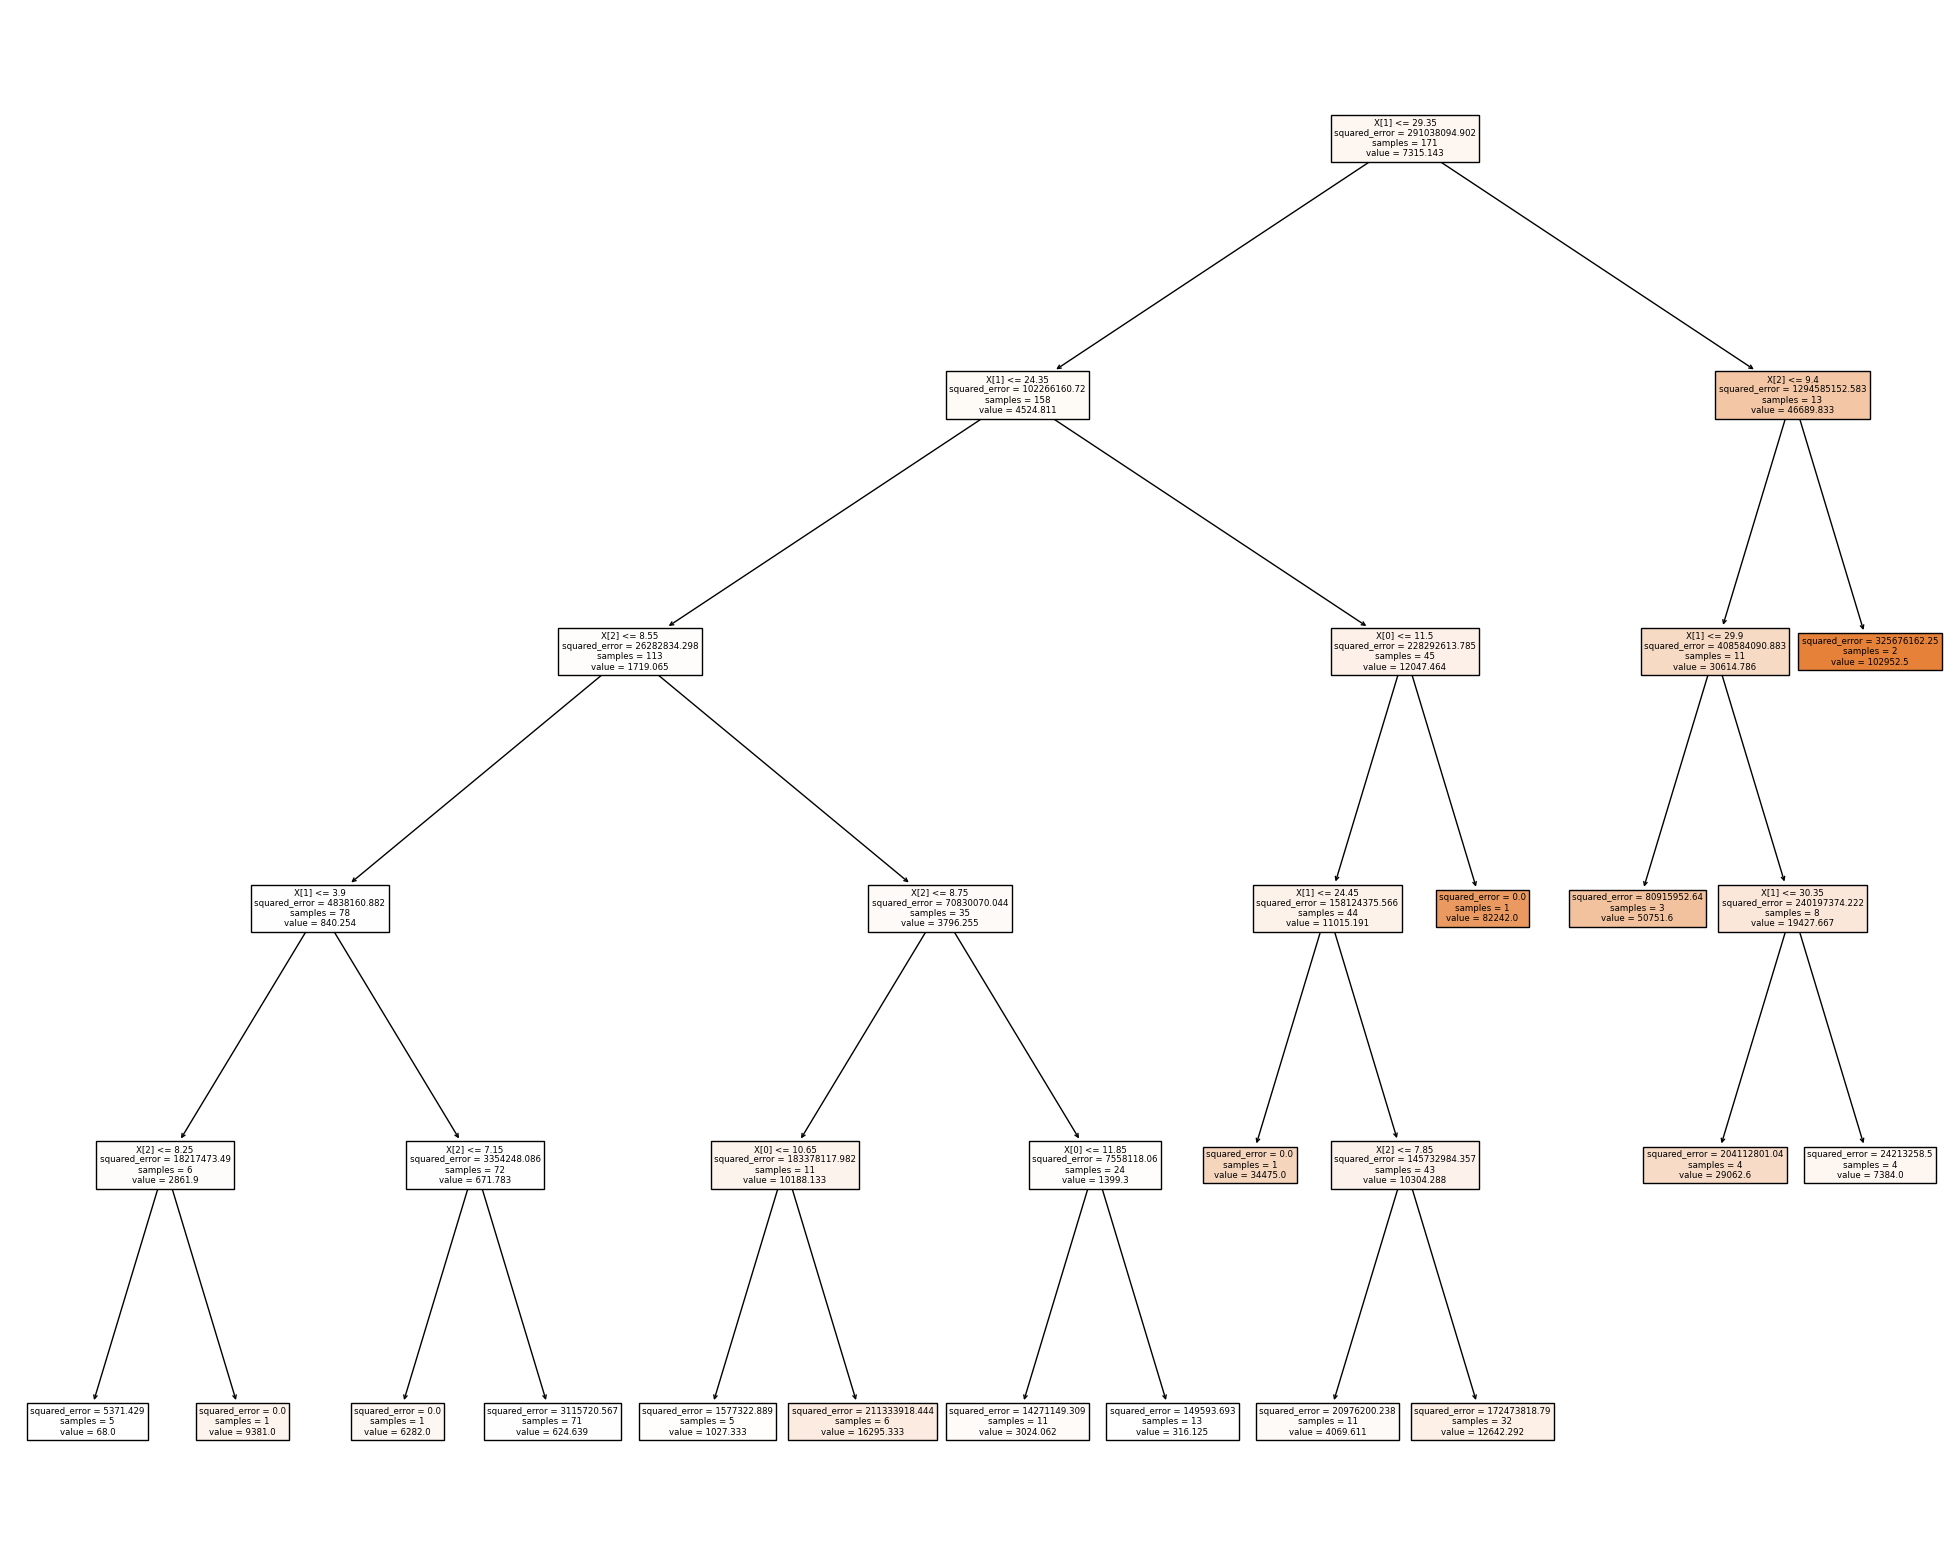

In [65]:
plt.show()